In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


df = pd.read_csv('./datasets/housing.csv', sep=',')
df.head()


df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where( df['income_cat'] < 5.0, 5.0, inplace = True)

strat_train, strat_test = train_test_split(df, test_size = 0.2, random_state = 5, stratify = df['income_cat'])

strat_train.drop(labels= ['income_cat'], axis = 1, inplace = True)
strat_test.drop(labels= ['income_cat'], axis = 1, inplace = True)


In [25]:
housing = strat_train.copy()


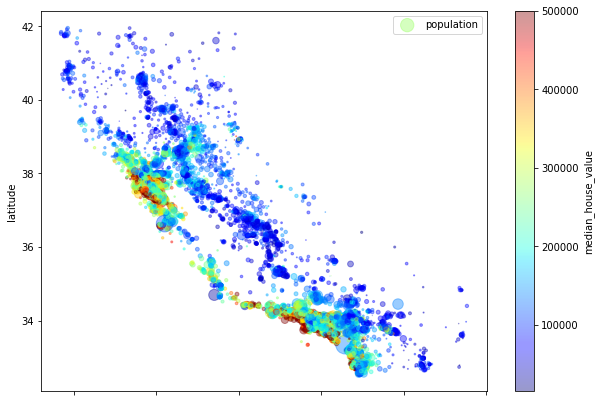

In [26]:

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, cmap = plt.get_cmap("jet"), colorbar = True, 
            figsize = (10,7), c = 'median_house_value', s = housing['population']/100 , label = 'population' )
plt.legend()

In [27]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924622,-0.111858,0.045660,0.068973,0.098344,0.055788,-0.016064,-0.047957
latitude,-0.924622,1.000000,0.013934,-0.037600,-0.066970,-0.107396,-0.071499,-0.078318,-0.142464
housing_median_age,-0.111858,0.013934,1.000000,-0.359661,-0.320337,-0.293131,-0.302353,-0.120744,0.104159
total_rooms,0.045660,-0.037600,-0.359661,1.000000,0.931515,0.856309,0.920662,0.201432,0.135369
total_bedrooms,0.068973,-0.066970,-0.320337,0.931515,1.000000,0.877671,0.980999,-0.002544,0.051031
population,0.098344,-0.107396,-0.293131,0.856309,0.877671,1.000000,0.905518,0.007531,-0.023733
households,0.055788,-0.071499,-0.302353,0.920662,0.980999,0.905518,1.000000,0.017263,0.066257
median_income,-0.016064,-0.078318,-0.120744,0.201432,-0.002544,0.007531,0.017263,1.000000,0.686568
median_house_value,-0.047957,-0.142464,0.104159,0.135369,0.051031,-0.023733,0.066257,0.686568,1.000000


In [28]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.686568
total_rooms           0.135369
housing_median_age    0.104159
households            0.066257
total_bedrooms        0.051031
population           -0.023733
longitude            -0.047957
latitude             -0.142464
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

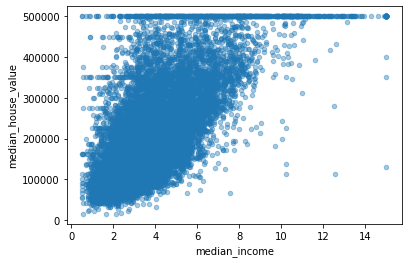

In [29]:
housing.plot(kind= 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.4)

In [30]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.686568
rooms_per_household    0.143970
total_rooms            0.135369
housing_median_age     0.104159
households             0.066257
total_bedrooms         0.051031
population            -0.023733
longitude             -0.047957
latitude              -0.142464
bedrooms_per_room     -0.255372
Name: median_house_value, dtype: float64